# DATA

Study of a dataset cotaining various information about 32135 games published on Steam gaming plataform.

| Columna | Descripción | Ejemplo |
| -- | - | - |
| publisher | Empresa publicadora del contenido | [Ubisoft,Dovetail Games - Trains,Degica] |
| genres | Genero del contenido | [Action, Adventure, Racing, Simulation, Strategy] |
| app_name | Nombre del contenido | [Warzone, Soundtrack, Puzzle Blocks] |
| title | Titulo del contenido | [The Dream Machine: Chapter 4 , Fate/EXTELLA - Sweet Room Dream, Fate/EXTELLA - Charming Bunny] |
| url | URL de publicación del contenido | http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/ |
| release_date | Fecha de lanzamiento | [2018-01-04] |
| tags | etiquetas de contenido | [Simulation, Indie, Action, Adventure, Funny, Open World, First-Person, Sandbox, Free to Play] |
| discount_price | precio de descuento | [22.66, 0.49, 0.69] |
| reviews_url | Reviews de contenido | http://steamcommunity.com/app/681550/reviews/?browsefilter=mostrecent&p=1 |
| specs | Especificaciones | [Multi-player, Co-op, Cross-Platform Multiplayer, Downloadable Content] |
| price | Precio del contenido | [4.99, 9.99, Free to Use, Free to Play] |
| early_access | acceso temprano | [False, True] |
| id | identificador unico de contenido | [761140, 643980, 670290] |
| developer | Desarrollador | [Kotoshiro, Secret Level SRL, Poolians.com] |
| sentiment | Análisis de sentimiento | [Mixed, Very Positive, Positive, 3 user reviews] |
| metascore | Score por metacritic | [80, 74, 77, 75] |



# EDA

Make an EDA to understand the data and prepare a model to predict the price.


    def predicción( genero, earlyaccess = True/False, (Variables que elijas) ): Retorna el precio predicho dado los parametros pasados y **RMSC** del modelo.

Import relevant libraries.

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

Opening the JSON with the correct format that we exported in preprocessing.

In [311]:
rawGamesDf = pd.read_json("datasets/steam_games_format_ok.json")

In [312]:
cleanedGamesDf = rawGamesDf
cleanedGamesDf.head()

,publisher,genres,app_name,tags,discount_price,specs,price,early_access,id,developer,sentiment,metascore,year
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,761140.0,Kotoshiro,None,None,2018
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,None,2018
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,None,2017
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,"[Action, Adventure, Casual]",0.83,[Single-player],0.99,False,767400.0,彼岸领域,None,None,2017
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,"[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,"[Single-player, Steam Achievements]",3.99,False,772540.0,Trickjump Games Ltd,Mixed,None,2018


## Basic Info

In [313]:
# Column names
cleanedGamesDf.columns

Index(['publisher', 'genres', 'app_name', 'tags', 'discount_price', 'specs',
       'price', 'early_access', 'id', 'developer', 'sentiment', 'metascore',
       'year'],
      dtype='object')

In [314]:
cleanedGamesDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 32133
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       23968 non-null  object 
 1   genres          28731 non-null  object 
 2   app_name        29965 non-null  object 
 3   tags            29804 non-null  object 
 4   discount_price  204 non-null    float64
 5   specs           29296 non-null  object 
 6   price           28817 non-null  object 
 7   early_access    29965 non-null  bool   
 8   id              29964 non-null  float64
 9   developer       28716 non-null  object 
 10  sentiment       23154 non-null  object 
 11  metascore       2622 non-null   object 
 12  year            29965 non-null  int64  
dtypes: bool(1), float64(2), int64(1), object(9)
memory usage: 3.0+ MB


## Columns: app_name, id
The information on those 2 columns are unique to each game, so they will not provide much information and that's why we will drop them. Title was already drop before.

In [315]:
cleanedGamesDf.drop(columns=['app_name', 'id'], inplace=True)

In [316]:
cleanedGamesDf.head()

,publisher,genres,tags,discount_price,specs,price,early_access,developer,sentiment,metascore,year
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,Kotoshiro,None,None,2018
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,Secret Level SRL,Mostly Positive,None,2018
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,Poolians.com,Mostly Positive,None,2017
3,彼岸领域,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",0.83,[Single-player],0.99,False,彼岸领域,None,None,2017
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,"[Single-player, Steam Achievements]",3.99,False,Trickjump Games Ltd,Mixed,None,2018


## Column: year
Since we are going to be predicting prices, we should drop all games that are too old.

In [317]:
cleanedGamesDf = cleanedGamesDf[cleanedGamesDf['year'] > 1999]

---

## Function to describe columns

In [318]:
def column_describe(name):
    """
    Basic description of a categorical column.
    """
    print('Describe:')
    print(cleanedGamesDf[name].describe())
    print('')
    print('Unique Values:')
    print(cleanedGamesDf[name].unique())
    print('')
    print('NaN amount:', cleanedGamesDf[name].isna().sum())

## publisher

In [319]:
column_describe('publisher')

Describe:
count       23654
unique       8151
top       Ubisoft
freq          384
Name: publisher, dtype: object

Unique Values:
['Kotoshiro' 'Making Fun, Inc.' 'Poolians.com' ... 'OrtiGames/OrtiSoft'
 'INGAME' 'Bidoniera Games']

NaN amount: 5920


## developer

In [320]:
column_describe('developer')

Describe:
count                       28403
unique                      10824
top       Ubisoft - San Francisco
freq                         1259
Name: developer, dtype: object

Unique Values:
['Kotoshiro' 'Secret Level SRL' 'Poolians.com' ...
 'Oscar Ortigueira López,OrtiGames/OrtiSoft' 'INGAME' 'Bidoniera Games']

NaN amount: 1171


This two columns there are a lot of unique values and a lot of NaNs, we could try label encoding, but for now we will drop them.

In [321]:
cleanedGamesDf = cleanedGamesDf.drop(columns=['publisher', 'developer'])

In [322]:
cleanedGamesDf.head()

,genres,tags,discount_price,specs,price,early_access,sentiment,metascore,year
0,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,None,None,2018
1,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,Mostly Positive,None,2018
2,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,Mostly Positive,None,2017
3,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",0.83,[Single-player],0.99,False,None,None,2017
5,"[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,"[Single-player, Steam Achievements]",3.99,False,Mixed,None,2018


---

## Column: genres, tags and specs

We need to start working with genres, because it's a column containing a list of different items. We should try to make a column for each genre.

In [323]:
print('Describe:')
print(cleanedGamesDf['genres'].describe())
print('')
print('NaN amount:', cleanedGamesDf['genres'].isna().sum())

Describe:
count        28415
unique         881
top       [Action]
freq          1814
Name: genres, dtype: object

NaN amount: 1159


In [324]:
genresCompleteList = cleanedGamesDf.explode(column=['genres'])['genres'].unique()
print(genresCompleteList)
print(genresCompleteList.shape)

['Action' 'Casual' 'Indie' 'Simulation' 'Strategy' 'Free to Play' 'RPG'
 'Sports' 'Adventure' 'Racing' None 'Massively Multiplayer' 'Early Access'
 'Animation &amp; Modeling' 'Video Production' 'Web Publishing'
 'Education' 'Software Training' 'Utilities' 'Design &amp; Illustration'
 'Audio Production' 'Photo Editing' 'Accounting']
(23,)


We have 22 genres + NaN

We could use a groupby and get dummies to get all the genre columns.

In [325]:
cleanedGamesDf.explode(column=['genres'])['genres'].value_counts()

genres
Indie                        15738
Action                       11111
Casual                        8211
Adventure                     8067
Strategy                      6865
Simulation                    6631
RPG                           5417
Free to Play                  2024
Early Access                  1446
Sports                        1248
Massively Multiplayer         1104
Racing                        1064
Design &amp; Illustration      460
Utilities                      338
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64

In [326]:
# Using pd.get_dummies() method
genresDummies = pd.get_dummies(cleanedGamesDf['genres'].apply(pd.Series).stack(), prefix='genre').groupby(level=0).sum()
genresDummies.head()

,genre_Accounting,genre_Action,genre_Adventure,genre_Animation &amp; Modeling,genre_Audio Production,genre_Casual,genre_Design &amp; Illustration,genre_Early Access,genre_Education,genre_Free to Play,...,genre_Photo Editing,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Web Publishing
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


We can correct & amp ; to &.

In [327]:
genresDummies.rename({"genre_Animation &amp; Modeling": "genre_Animation & Modeling", "genre_Design &amp; Illustration": "genre_Design & Illustration"}, axis='columns', inplace=True)

In [328]:
genresDummies.columns

Index(['genre_Accounting', 'genre_Action', 'genre_Adventure',
       'genre_Animation & Modeling', 'genre_Audio Production', 'genre_Casual',
       'genre_Design & Illustration', 'genre_Early Access', 'genre_Education',
       'genre_Free to Play', 'genre_Indie', 'genre_Massively Multiplayer',
       'genre_Photo Editing', 'genre_RPG', 'genre_Racing', 'genre_Simulation',
       'genre_Software Training', 'genre_Sports', 'genre_Strategy',
       'genre_Utilities', 'genre_Video Production', 'genre_Web Publishing'],
      dtype='object')

In [329]:
# Let's merge the new genres data with the original DataFrame.
cleanedGamesDf = cleanedGamesDf.merge(genresDummies, left_index=True, right_index=True)

# Now we will also drop the genres column since we do not need it anymore.
cleanedGamesDf.drop(columns='genres', inplace=True)
cleanedGamesDf.head()

,tags,discount_price,specs,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,...,genre_Photo Editing,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Web Publishing
0,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,None,None,2018,0,1,...,0,0,0,1,0,0,1,0,0,0
1,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,Mostly Positive,None,2018,0,0,...,0,1,0,0,0,0,1,0,0,0
2,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,Mostly Positive,None,2017,0,0,...,0,0,0,1,0,1,0,0,0,0
3,"[Action, Adventure, Casual]",0.83,[Single-player],0.99,False,None,None,2017,0,1,...,0,0,0,0,0,0,0,0,0,0
5,"[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,"[Single-player, Steam Achievements]",3.99,False,Mixed,None,2018,0,1,...,0,0,0,1,0,0,0,0,0,0


**tags**

In [330]:
tagsCompleteList = cleanedGamesDf.explode(column=['tags'])['tags'].unique()
print(tagsCompleteList)
print(tagsCompleteList.shape)

['Strategy' 'Action' 'Indie' 'Casual' 'Simulation' 'Free to Play' 'RPG'
 'Card Game' 'Trading Card Game' 'Turn-Based' 'Fantasy' 'Tactical'
 'Dark Fantasy' 'Board Game' 'PvP' '2D' 'Competitive' 'Replay Value'
 'Character Customization' 'Female Protagonist' 'Difficult'
 'Design & Illustration' 'Sports' 'Multiplayer' 'Adventure' 'FPS'
 'Shooter' 'Third-Person Shooter' 'Sniper' 'Third Person' 'Racing'
 'Pixel Graphics' 'Cute' 'Physics' 'Science' 'Turn-Based Strategy'
 'Platformer' 'Side Scroller' 'Massively Multiplayer' 'Clicker' 'Classic'
 'Atmospheric' 'Gothic' 'Great Soundtrack' 'Isometric' 'First-Person'
 'Stealth' 'Mystery' 'Assassin' 'Funny' 'Survival' 'Singleplayer' 'Comedy'
 'Stylized' 'Early Access' 'Rome' 'Historical' 'Open World' 'Realistic'
 'Crafting' 'Trading' 'MMORPG' 'Swordplay' 'Hunting' 'Violent'
 'Experience' 'Silent Protagonist' 'City Builder' 'Building' 'Economy'
 'Base Building' 'Sci-fi' 'Story Rich' 'Wargame' 'Cold War'
 'Real-Time with Pause' 'RTS' 'Diplomacy' 'War'

In [331]:
cleanedGamesDf.explode(column=['tags'])['tags'].value_counts().head(40)

tags
Indie                    16219
Action                   11674
Adventure                 9015
Casual                    8789
Strategy                  7261
Simulation                6971
RPG                       5720
Singleplayer              4102
Multiplayer               2244
Free to Play              2209
Great Soundtrack          2138
Puzzle                    1985
2D                        1906
Atmospheric               1800
Early Access              1446
Platformer                1392
Story Rich                1380
Sports                    1297
Fantasy                   1263
Open World                1255
Difficult                 1244
Massively Multiplayer     1241
Pixel Graphics            1209
Co-op                     1181
Sci-fi                    1179
Female Protagonist        1141
Horror                    1124
Racing                    1101
Anime                     1098
Shooter                   1094
Funny                     1052
First-Person               928
Tur

In [332]:
# # Using pd.get_dummies() method
# tagsDummies = pd.get_dummies(cleanedGamesDf['tags'].apply(pd.Series).stack(), prefix='tags').groupby(level=0).sum()
# tagsDummies.head()

In [333]:
# # Let's merge the new Free to Play column data with the original DataFrame.
# cleanedGamesDf = cleanedGamesDf.merge(tagsDummies, left_index=True, right_index=True)
# cleanedGamesDf.head()

In [334]:
cleanedGamesDf.drop(columns='tags', inplace=True)
cleanedGamesDf.head()

,discount_price,specs,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,...,genre_Photo Editing,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Web Publishing
0,4.49,[Single-player],4.99,False,None,None,2018,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,Mostly Positive,None,2018,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,Mostly Positive,None,2017,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0.83,[Single-player],0.99,False,None,None,2017,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,NaN,"[Single-player, Steam Achievements]",3.99,False,Mixed,None,2018,0,1,1,...,0,0,0,1,0,0,0,0,0,0


**specs**

In [335]:
specsCompleteList = cleanedGamesDf.explode(column=['specs'])['specs'].unique()
print(specsCompleteList)
print(specsCompleteList.shape)

['Single-player' 'Multi-player' 'Online Multi-Player'
 'Cross-Platform Multiplayer' 'Steam Achievements' 'Steam Trading Cards'
 'In-App Purchases' 'Stats' 'Downloadable Content'
 'Full controller support' 'Steam Cloud' 'Steam Leaderboards'
 'Partial Controller Support' 'Local Co-op' 'Shared/Split Screen'
 'Local Multi-Player' 'Steam Turn Notifications' 'MMO' 'Co-op'
 'Valve Anti-Cheat enabled' 'Captions available' 'Steam Workshop'
 'Includes level editor' 'Mods' 'Mods (require HL2)' 'Online Co-op'
 'Game demo' 'Includes Source SDK' 'Commentary available' None
 'SteamVR Collectibles' 'Mods (require HL1)']
(32,)


In [336]:
cleanedGamesDf.explode(column=['specs'])['specs'].value_counts().head(20)

specs
Single-player                 25270
Steam Achievements            15738
Downloadable Content          12520
Steam Trading Cards           11876
Steam Cloud                    9654
Multi-player                   7908
Full controller support        7052
Partial Controller Support     6276
Steam Leaderboards             5740
Co-op                          4187
Shared/Split Screen            3874
Cross-Platform Multiplayer     2453
Stats                          2181
Online Multi-Player            2137
Steam Workshop                 1817
Includes level editor          1326
Local Multi-Player             1125
Captions available              946
MMO                             923
In-App Purchases                912
Name: count, dtype: int64

In [337]:
# # Using pd.get_dummies() method
# specsDummies = pd.get_dummies(cleanedGamesDf['specs'].apply(pd.Series).stack(), prefix='specs').groupby(level=0).sum()
# specsDummies.head()

In [338]:
# cleanedGamesDf = cleanedGamesDf.merge(specsDummies, left_index=True, right_index=True)
# cleanedGamesDf.head()

Too much info in specs to make individual columns, we might keep only the most frecuent tags. **DROP FOR NOW?????????**

In [339]:
cleanedGamesDf.drop(columns='specs', inplace=True)
cleanedGamesDf.head()

,discount_price,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,...,genre_Photo Editing,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Web Publishing
0,4.49,4.99,False,None,None,2018,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,NaN,Free To Play,False,Mostly Positive,None,2018,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,NaN,Free to Play,False,Mostly Positive,None,2017,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0.83,0.99,False,None,None,2017,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,3.99,False,Mixed,None,2018,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


## discount_price

In [340]:
column_describe('discount_price')

Describe:
count    204.000000
mean      12.605392
std       18.207547
min        0.490000
25%        0.890000
50%        4.090000
75%       22.660000
max      139.990000
Name: discount_price, dtype: float64

Unique Values:
[  4.49    nan   0.83   8.79   1.59   0.59   0.84   7.19   6.79   9.89
   5.99   0.49   0.74  22.66  49.96   0.89  14.99   6.29   3.14  59.11
   7.49  13.39  10.49  35.97   0.99   7.99  11.39  24.9    3.59   2.69
   3.49   4.68   4.19  17.08   8.99   0.62   2.99  19.78   2.05   2.39
  19.99  79.99  49.99 139.99   2.44   0.69   3.74   0.79   1.79   1.49
   3.99   6.99   2.09  10.04  24.82  29.75   6.74   4.79   2.19   3.34
   0.5    5.24   2.51   1.19   1.99   0.66  22.46  44.1    9.99   3.24
  17.49   1.39  31.49   1.69   4.24  25.49   3.19  11.69  11.99]

NaN amount: 28211


In [341]:
amount_games_0_dscount_price = cleanedGamesDf[cleanedGamesDf['discount_price'] == 0]['discount_price'].shape[0]
amount_games_NaN_dscount_price = cleanedGamesDf[cleanedGamesDf['discount_price'].isna()]['discount_price'].shape[0]

print(f"Amount of games with  0  discount price: {amount_games_0_dscount_price}")
print(f"Amount of games with NaN discount price: {amount_games_NaN_dscount_price}")

Amount of games with  0  discount price: 0
Amount of games with NaN discount price: 28211


Since there are no games with 0 discount price we can assume that all the NaNs are games with no discount price. That's why we can impute 0 into the NaNs in that column.

In [342]:
cleanedGamesDf['discount_price'].fillna(0, inplace=True)

Since we will not be using it for now we will drop it.

In [343]:
cleanedGamesDf.drop(columns='discount_price', inplace=True)
cleanedGamesDf.head()

,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,...,genre_Photo Editing,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Web Publishing
0,4.99,False,None,None,2018,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,Free To Play,False,Mostly Positive,None,2018,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,Free to Play,False,Mostly Positive,None,2017,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0.99,False,None,None,2017,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3.99,False,Mixed,None,2018,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## price

In [344]:
column_describe('price')

Describe:
count     27308.00
unique      149.00
top           4.99
freq       3797.00
Name: price, dtype: float64

Unique Values:
[4.99 'Free To Play' 'Free to Play' 0.99 3.99 9.99 18.99 29.99 None 10.99
 2.99 1.5899999999999999 14.99 1.99 59.99 8.99 6.99 7.99 39.99 'Free'
 19.99 7.49 12.99 5.99 2.49 15.99 1.25 24.99 17.99 61.99 3.49 11.99 13.99
 'Free Demo' 'Play for Free!' 34.99 1.49 32.99 99.99 14.95 69.99 16.99
 79.99 49.99 5.0 44.99 13.98 29.96 109.99 149.99 771.71 'Install Now'
 21.99 89.99 'Play WARMACHINE: Tactics Demo' 0.98 139.92 4.29 64.99
 'Free Mod' 54.99 74.99 'Install Theme' 0.89 'Third-party' 0.5 'Play Now'
 299.99 1.29 119.99 3.0 15.0 5.49 23.99 49.0 20.99 10.93
 1.3900000000000001 'Free HITMAN™ Holiday Pack' 36.99 4.49 2.0 4.0
 1.9500000000000002 1.5 199.0 189.0 6.66 27.99 129.99 179.0 26.99 399.99
 31.99 399.0 20.0 40.0 3.33 22.99 320.0 38.85 71.7 995.0 27.49 3.39 6.0
 19.95 499.99 199.99 16.06 4.68 131.4 44.98 202.76 2.3 0.9500000000000001
 172.24 249.99 2.969999999

First let's use the "tags_Free to Play" and "genre_Free to Play" column to fill to 0 the ones that have NaNs in price.

In [345]:
# cleanedGamesDf[cleanedGamesDf['price'].isna() & (cleanedGamesDf['tags_Free to Play'] | cleanedGamesDf['genre_Free to Play'])]
cleanedGamesDf[cleanedGamesDf['price'].isna() & (cleanedGamesDf['genre_Free to Play'])]

,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,...,genre_Photo Editing,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Web Publishing
968,None,False,Positive,None,2012,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1151,None,False,Mixed,None,2012,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1559,None,False,Mostly Positive,None,2015,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1780,None,False,2 user reviews,None,2013,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1909,None,False,Very Positive,None,2013,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29180,None,False,Very Positive,None,2014,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29428,None,True,1 user reviews,None,2014,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29435,None,False,Very Positive,None,2014,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29967,None,False,Mixed,47,2013,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [346]:
# In the cases that we have NaN as price and 1 tag or genre Free to Play column we put 0 to the price.
# cleanedGamesDf['price'].loc[cleanedGamesDf['price'].isna() & (cleanedGamesDf['tags_Free to Play'] | cleanedGamesDf['genre_Free to Play'])] = 0
cleanedGamesDf['price'].loc[cleanedGamesDf['price'].isna() & (cleanedGamesDf['genre_Free to Play'])] = 0

C:\Users\Sebas\AppData\Local\Temp\ipykernel_7644\83787759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedGamesDf['price'].loc[cleanedGamesDf['price'].isna() & (cleanedGamesDf['genre_Free to Play'])] = 0


In [347]:
# cleanedGamesDf[cleanedGamesDf['price'].isna() & (cleanedGamesDf['tags_Free to Play'] | cleanedGamesDf['genre_Free to Play'])]
cleanedGamesDf[cleanedGamesDf['price'].isna() & (cleanedGamesDf['genre_Free to Play'])]

,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,...,genre_Photo Editing,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Web Publishing


Now let's drop the remaining NaNs because we do not have enough information to assume that they are free or which price are they selling to.

In [348]:
cleanedGamesDf[cleanedGamesDf['price'].isna()]

,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,...,genre_Photo Editing,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Web Publishing
9,None,False,None,None,2018,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
31,None,False,None,None,2018,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32,None,False,None,None,2018,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,None,False,None,None,2018,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
35,None,False,None,None,2017,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32099,None,False,None,None,2018,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32111,None,False,None,None,2002,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32123,None,True,None,None,2018,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
32125,None,False,None,None,2018,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [349]:
cleanedGamesDf.dropna(subset=['price'], inplace=True)

In [350]:
cleanedGamesDf['price'].isna().sum()

0

There are several games that have some text instead of price.

Most notably the word "Free" referring to free to play games. We could find them all and put them a price of 0.

In [351]:
cleanedGamesDf[cleanedGamesDf['price'].map(type) == str]['price'].unique()

array(['Free To Play', 'Free to Play', 'Free', 'Free Demo',
       'Play for Free!', 'Install Now', 'Play WARMACHINE: Tactics Demo',
       'Free Mod', 'Install Theme', 'Third-party', 'Play Now',
       'Free HITMAN™ Holiday Pack', 'Play the Demo', 'Free to Try',
       'Free to Use'], dtype=object)

In [352]:
print("Games containinig Free on the price:", cleanedGamesDf['price'].str.count("Free").sum())

Games containinig Free on the price: 1527.0


In [353]:
# Change all games containing Free to 0
cleanedGamesDf[cleanedGamesDf['price'].str.contains('Free', na=False)] = 0

We could eliminate all rows with prices that are still a string since there are few.

In [354]:
cleanedGamesDf[cleanedGamesDf['price'].map(type) == str]['price'].count()

8

In [355]:
cleanedGamesDf[cleanedGamesDf['price'].map(type) == str]['price'].unique()

array(['Install Now', 'Play WARMACHINE: Tactics Demo', 'Install Theme',
       'Third-party', 'Play Now', 'Play the Demo'], dtype=object)

In [356]:
cleanedGamesDf[cleanedGamesDf['price'].map(type) == str]

,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,...,genre_Photo Editing,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Web Publishing
2405,Install Now,False,Mostly Positive,None,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2871,Play WARMACHINE: Tactics Demo,False,Mixed,None,2014,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3832,Install Theme,False,4 user reviews,None,2015,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3918,Third-party,False,None,None,2015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4026,Play Now,False,Mostly Positive,None,2015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22734,Play the Demo,False,Very Positive,None,2016,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26217,Play Now,False,None,None,2015,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
31838,Third-party,False,Very Positive,None,2007,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [357]:
cleanedGamesDf.drop(index=cleanedGamesDf[cleanedGamesDf['price'].map(type) == str].index, inplace=True)

In [358]:
cleanedGamesDf[cleanedGamesDf['price'].map(type) == str]['price'].unique()

array([], dtype=object)

Now change DataType of price to numeric.

In [359]:
cleanedGamesDf['price'] = pd.to_numeric(cleanedGamesDf['price'])
cleanedGamesDf['price'].info()

<class 'pandas.core.series.Series'>
Index: 27439 entries, 0 to 32133
Series name: price
Non-Null Count  Dtype  
--------------  -----  
27439 non-null  float64
dtypes: float64(1)
memory usage: 428.7 KB


In [360]:
cleanedGamesDf['price'].describe()

count    27439.000000
mean         8.982740
std         16.012784
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

We see that there are extremly high prices while the mean is less than 10. In general most expensive AAA games don't sell for more than 60 dollars, so we wiil remove the ones that are more than 60.

In [361]:
cleanedGamesDf[cleanedGamesDf['price'] > 60]

,price,early_access,sentiment,metascore,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,...,genre_Photo Editing,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Web Publishing
425,61.99,False,Mostly Positive,None,2010,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1094,99.99,False,Very Positive,None,2012,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1253,69.99,False,Positive,None,2013,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1491,79.99,False,8 user reviews,None,2013,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1801,99.99,False,Very Positive,None,2013,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29865,99.99,False,None,None,2013,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30318,79.99,False,Mostly Positive,None,2013,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
30353,160.91,False,Mixed,None,2013,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
30451,99.99,False,Mostly Positive,None,2012,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [362]:
filter = cleanedGamesDf['price'] > 60
cleanedGamesDf = cleanedGamesDf[~filter]

(array([9.620e+03, 6.059e+03, 2.383e+03, 3.898e+03, 1.852e+03, 2.500e+02,
        1.628e+03, 1.600e+01, 3.670e+02, 4.830e+02, 8.000e+00, 1.040e+02,
        3.000e+00, 2.800e+02, 3.400e+01, 0.000e+00, 1.570e+02, 0.000e+00,
        1.700e+01, 9.400e+01]),
 array([ 0.    ,  2.9995,  5.999 ,  8.9985, 11.998 , 14.9975, 17.997 ,
        20.9965, 23.996 , 26.9955, 29.995 , 32.9945, 35.994 , 38.9935,
        41.993 , 44.9925, 47.992 , 50.9915, 53.991 , 56.9905, 59.99  ]),
 <BarContainer object of 20 artists>)

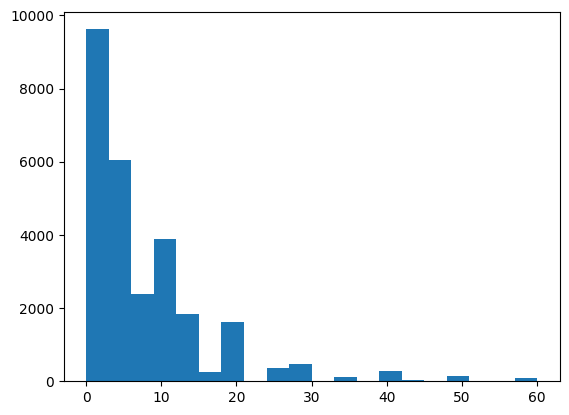

In [363]:
plt.hist(cleanedGamesDf['price'], bins = 20)

## early access

We should transform to binary numbers

In [364]:
cleanedGamesDf['early_access'] = cleanedGamesDf['early_access'].astype(int)
cleanedGamesDf['early_access'].info()

<class 'pandas.core.series.Series'>
Index: 27253 entries, 0 to 32133
Series name: early_access
Non-Null Count  Dtype
--------------  -----
27253 non-null  int32
dtypes: int32(1)
memory usage: 319.4 KB


## metascore

We should drop them since most are NaNs 

In [365]:
column_describe('metascore')

Describe:
count     4000
unique      71
top          0
freq      1527
Name: metascore, dtype: int64

Unique Values:
[None 0 84 80 76 70 'NA' 69 81 75 72 66 67 77 91 83 88 65 94 57 96 86 87
 92 79 82 89 58 74 85 90 68 71 60 73 59 64 61 54 53 78 51 44 63 38 56 49
 52 62 93 48 34 95 43 55 24 46 41 20 39 45 35 47 40 36 50 32 37 33 42 29
 30]

NaN amount: 23253


In [366]:
cleanedGamesDf.drop(columns='metascore', inplace=True)

## sentiment
We could use ordinal encoder to code this one.

We should convert the NaN to most frecuent, that is also Mixed, that is should indicate a relativly neutral value.

In [367]:
cleanedGamesDf.shape

(27253, 26)

In [368]:
cleanedGamesDf['sentiment'].isna().sum()

5613

In [369]:
# Let's impute the most frequent to the nan values.
mostFreqSentiment = cleanedGamesDf['sentiment'].value_counts().index[0]
cleanedGamesDf['sentiment'] = cleanedGamesDf['sentiment'].fillna(mostFreqSentiment)

In [370]:
cleanedGamesDf['sentiment'].isna().sum()

0

In [371]:
cleanedGamesDf.shape

(27253, 26)

In [372]:
cleanedGamesDf['sentiment'].unique()

array(['Mixed', 0, '1 user reviews', '3 user reviews', 'Mostly Positive',
       'Very Positive', '6 user reviews', '5 user reviews',
       '2 user reviews', 'Overwhelmingly Positive', 'Positive',
       'Mostly Negative', 'Very Negative', '9 user reviews',
       '8 user reviews', 'Negative', '7 user reviews', '4 user reviews',
       'Overwhelmingly Negative'], dtype=object)

In [373]:
cleanedGamesDf['sentiment'].value_counts()

sentiment
Mixed                      8936
Very Positive              3127
Positive                   2561
Mostly Positive            2198
1 user reviews             2063
0                          1527
2 user reviews             1435
3 user reviews              981
4 user reviews              777
Mostly Negative             686
5 user reviews              679
6 user reviews              592
7 user reviews              468
8 user reviews              421
9 user reviews              397
Overwhelmingly Positive     264
Negative                    111
Very Negative                24
Overwhelmingly Negative       6
Name: count, dtype: int64

Change the 0 and the others with few reviews to the most frequent that seems neutral since is a 0 value sentiment. "Mixed" in this case.

In [374]:
# We will remove the 0 sentiment rows because probably there where no reviews in them.
filter = cleanedGamesDf['sentiment'] == 0

# cleanedGamesDf[filter] = cleanedGamesDf[filter].replace(0, mostFreqSentiment)
cleanedGamesDf['sentiment'].iloc[filter] = mostFreqSentiment

C:\Users\Sebas\AppData\Local\Temp\ipykernel_7644\1684585302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedGamesDf['sentiment'].iloc[filter] = mostFreqSentiment


In [375]:
cleanedGamesDf['sentiment'].head()

0    Mixed
1    Mixed
2    Mixed
3    Mixed
5    Mixed
Name: sentiment, dtype: object

In [376]:
# Pattern of regex to extract "% user reviews".
pattern_to_del = '[0-9] user reviews'

filter = cleanedGamesDf['sentiment'].str.contains(pattern_to_del)

cleanedGamesDf['sentiment'].iloc[filter] = mostFreqSentiment

C:\Users\Sebas\AppData\Local\Temp\ipykernel_7644\3602085065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedGamesDf['sentiment'].iloc[filter] = mostFreqSentiment


In [377]:
cleanedGamesDf['sentiment'].value_counts()

sentiment
Mixed                      18276
Very Positive               3127
Positive                    2561
Mostly Positive             2198
Mostly Negative              686
Overwhelmingly Positive      264
Negative                     111
Very Negative                 24
Overwhelmingly Negative        6
Name: count, dtype: int64

Since it is important to put the right order, I did it mannualy.

In [378]:
sentimentDict = {
    'Overwhelmingly Positive' : 4,
    'Very Positive'           : 3,
    'Positive'                : 2,
    'Mostly Positive'         : 1,
    'Mixed'                   : 0,
    'Mostly Negative'         : -1,
    'Negative'                : -2,
    'Very Negative'           : -3,
    'Overwhelmingly Negative' : -4
    }

cleanedGamesDf['sentiment'] = cleanedGamesDf['sentiment'].replace(sentimentDict)

---

# CORRELATION BETWEEN NUMERIC FEATURES AND PRICE

<Axes: >

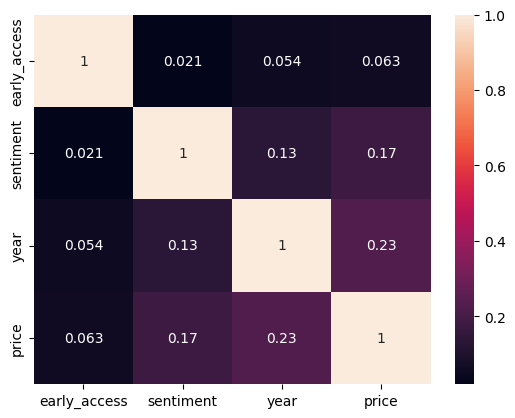

In [379]:
df_aux = cleanedGamesDf[['early_access', 'sentiment', 'year', 'price']]
sns.heatmap(df_aux.corr(), annot=True)

In [380]:
df_aux['price'].describe()

count    27253.000000
mean         8.176587
std          8.846595
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max         59.990000
Name: price, dtype: float64

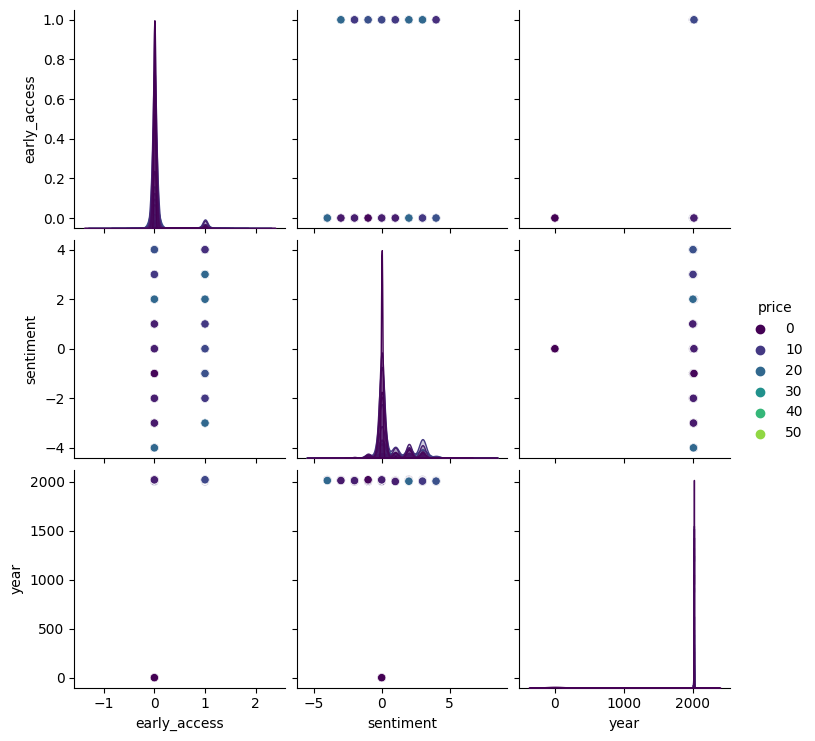

In [381]:
sns.pairplot(df_aux, hue = 'price', palette='viridis')
plt.show()

---

# Modeling

Import modeling.

In [382]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [383]:
y = cleanedGamesDf['price']
X = cleanedGamesDf.drop(columns=['price'])

In [384]:
X.head()

,early_access,sentiment,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,genre_Casual,genre_Design & Illustration,...,genre_Photo Editing,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Web Publishing
0,0,0,2018,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2017,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,2018,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [385]:
y.head()

0    4.99
1    0.00
2    0.00
3    0.99
5    3.99
Name: price, dtype: float64

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [387]:
X_test.head()

,early_access,sentiment,year,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,genre_Casual,genre_Design & Illustration,...,genre_Photo Editing,genre_RPG,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Web Publishing
12405,0,2,2017,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2147,0,0,2014,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
26097,0,0,2015,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
11041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29200,0,-1,2014,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [388]:
y_test.head()

12405    3.99
2147     8.99
26097    2.99
11041    0.00
29200    9.99
Name: price, dtype: float64

In [389]:
def check_pred(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print('RMSE', rmse)
    print('R2', r2_score(y_true, y_pred))
    print(pd.DataFrame(y_pred, y_true).head(10))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.scatter(y_true, y_pred, marker = '.')
    ax1.set_xlabel('True')
    ax1.set_ylabel('Prediction')
    ax1.plot(np.linspace(0,100), np.linspace(0,100), c = 'red')

    y_diff = y_true - y_pred

    ax2.hist(y_diff, bins = 15)
    ax2.set_xlabel('Difference (True - Pred)')
    ax2.set_ylabel('Amount of games in that range of diff')

    return rmse

### Linear Regression

RMSE 7.977007545076548
R2 0.2028257329248664
               0
price           
3.99    5.325843
8.99   10.409176
2.99    3.462851
0.00   -0.009330
9.99    5.981469
9.99   10.425625
39.99  15.246446
1.99    5.333058
4.99    6.703790
7.99    7.688791


7.977007545076548

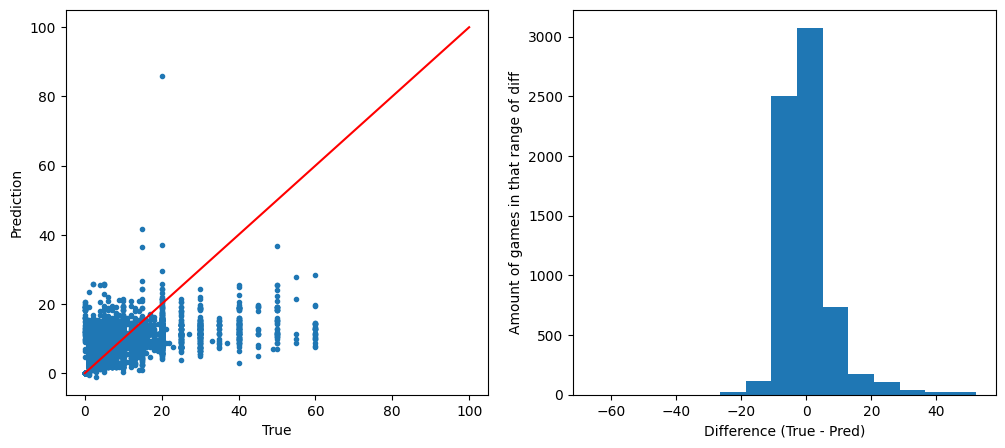

In [390]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
check_pred(y_test, y_pred_lr)

### XGBoost Regressor

RMSE 7.651965286874662
R2 0.26646769028782014
               0
price           
3.99    4.156899
8.99    9.918697
2.99    4.675389
0.00    0.238438
9.99    8.028550
9.99    9.792884
39.99  15.008072
1.99    5.140417
4.99    7.044555
7.99    6.165822


7.651965286874662

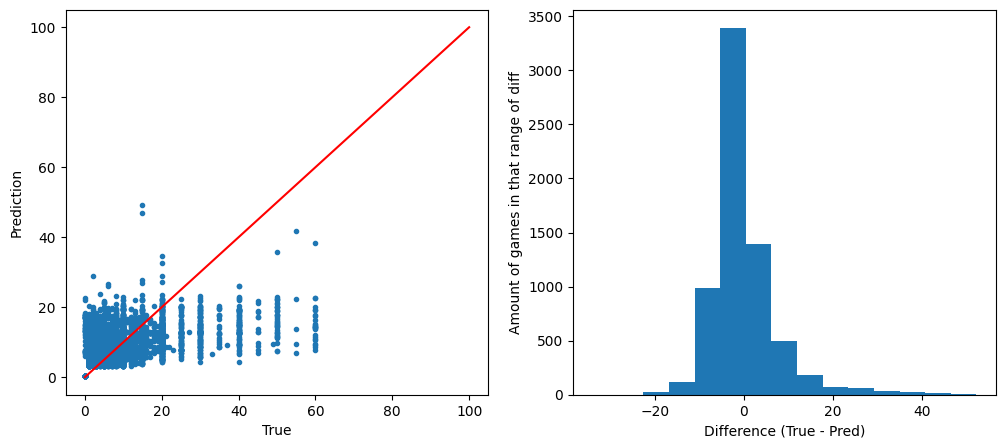

In [391]:
xbr = GradientBoostingRegressor()
xbr.fit(X_train, y_train)

y_pred_xbr = xbr.predict(X_test)
check_pred(y_test, y_pred_xbr)

### Decision Tree Regressor

RMSE 7.755620949786292
R2 0.2464598180227161
               0
price           
3.99    3.471481
8.99   11.166471
2.99    5.240000
0.00    0.000000
9.99   19.990000
9.99    3.490000
39.99  19.990000
1.99    7.990000
4.99    8.723333
7.99    4.620137


7.755620949786292

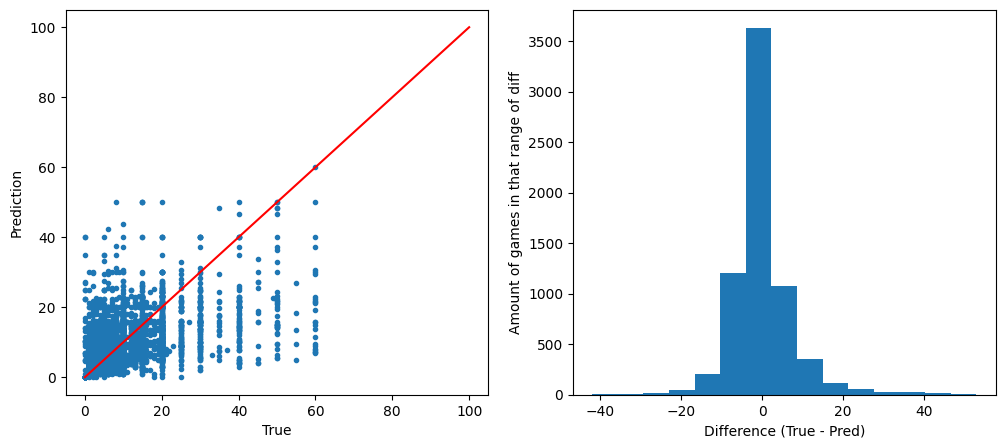

In [392]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)
check_pred(y_test, y_pred_dtr)

Is not very good according to r2 value near to 0. So let's try many trees with a Random Forest Regressor.

### Random Forest Regressor

RMSE 7.443168702538124
R2 0.305952825328761
               0
price           
3.99    3.436827
8.99   11.342087
2.99    5.039622
0.00    0.000000
9.99   13.703611
9.99    4.928667
39.99  19.894667
1.99    8.100405
4.99    8.510380
7.99    4.624187


7.443168702538124

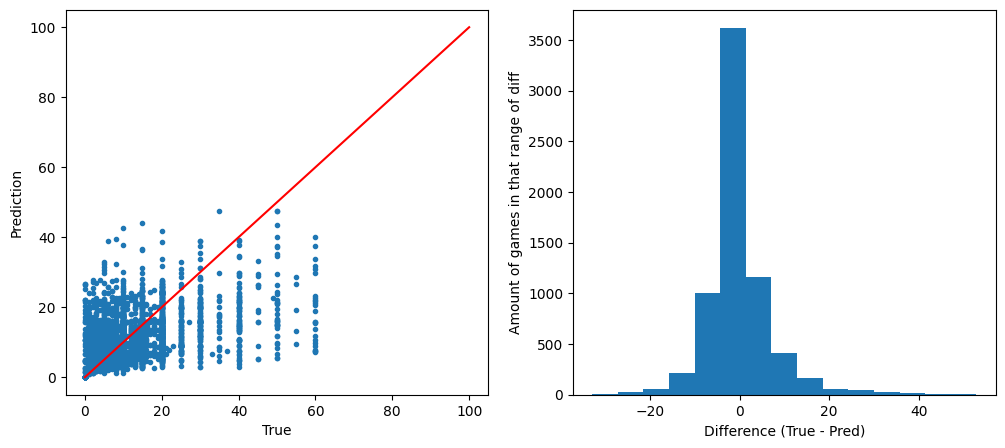

In [393]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)
check_pred(y_test, y_pred_rfr)

This one is much better, now we could do a Random Grid Search to tune hyperparameters.

Observation: I could also have done this with many estimators and parameters to check wich one works best, but that will have to be left for future improvements of this prediction.

### Tunning Hyperparameters

In [394]:
if False:
    rfr = RandomForestRegressor()

    params = {
                'n_estimators': [100],        # Number of trees in random forest
                'max_features': [1.0, 'sqrt', 'log2'],  # Number of features to consider at every split
                'max_depth': [10, 20, 50, 80, 100],     # Maximum number of levels in tree
                'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
                'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required at each leaf node
                'bootstrap': [True, False]}             # Method of selecting samples for training each tree

    rs_rfr = RandomizedSearchCV(rfr,
                        param_distributions=params,
                        n_iter = 5,
                        cv=3, verbose=2)

    rs_rfr.fit(X_train, y_train)

In [395]:
rs_rfr.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [396]:
# y_pred_rs_rfr = rs_rfr.predict(X_test)
# check_pred(y_test, y_pred_rs_rfr)

### Tunning with best hyperparameters

In [397]:
"""
{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

"""

best_rfr = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=80, bootstrap=True, random_state=0)
best_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=80, max_features='sqrt', random_state=0)

RMSE 7.415391958251118
R2 0.3111233111062103
               0
price           
3.99    3.436827
8.99   11.342087
2.99    5.003833
0.00    0.000000
9.99   14.907500
9.99    5.390833
39.99  19.890000
1.99    7.909167
4.99    8.510380
7.99    4.624187


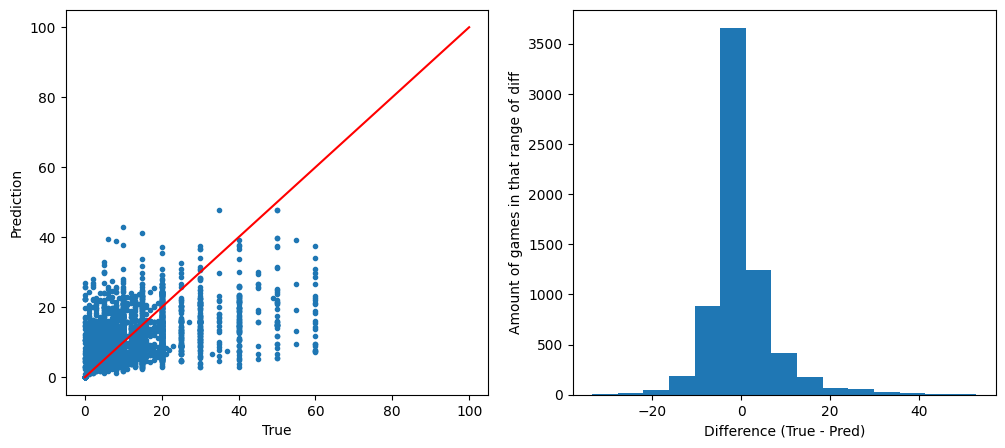

In [398]:
y_pred_best_rfr = best_rfr.predict(X_test)
final_RMSE = check_pred(y_test, y_pred_best_rfr)

# Export ML Model

In [399]:
import pickle

# save the model to disk
fname = 'Steam_Games_Model_SB.sav'
pickle.dump(best_rfr, open(fname, 'wb'))

Test

In [402]:
# Save a copy of name columns and order, and also RMSE onto a JSON.
import json

dic = {
    "RMSE" : final_RMSE,
    "Features" : X.columns.to_list(),
    "SentimentDict" : sentimentDict
    }

with open("Steam_Games_Model_Misc.json", "w") as outfile:
    json.dump(dic, outfile)


In [404]:
# def prediccion(earlyaccess: bool, sentiment: str, year: int, genre: list, tags: list, specs: list):
def prediccion(earlyaccess: bool, sentiment: str, year: int, genre: list):
    """
    Ingresando estos parámetros, deberíamos recibir el precio y RMSE.

    Input example:
    prediccion(
        earlyaccess=False,
        sentiment= 'Mostly Positive',
        year=2018,
        genre=['Action', 'Casual', 'Indie', 'Simulation', 'Strategy'],
        NO tags=['Strategy', 'Action', 'Indie', 'Casual', 'Simulation'],
        NO specs=['Single-player']
    )
    """
    import pickle
    import json
    import numpy as np

    # Open saved model
    fname = 'Steam_Games_Model_SB.sav'
    steam_games_price_model = pickle.load(open(fname, 'rb'))

    # Read extra Misc information, RMSE, name of features and Sentiment Dictionary.
    with open("Steam_Games_Model_Misc.json") as json_file:
        misc_dict = json.load(json_file)
    
    rmse = misc_dict["RMSE"]
    feat_names = misc_dict["Features"]
    sentiment_dict = misc_dict["SentimentDict"]
    print(feat_names)

    # Prepare data
    # TODO: Would like to put this on a Pipeline instead of doing this.

    # First let's create the x feature list and start putting its values.
    x = []
    
    # TODO VALIDATE
    if earlyaccess in (0, 1):
        x.append(earlyaccess)
    else:
        print("Error: Insert boolean value.")

    # For the sentiment one we should convert it to the same number we used before.
    if sentiment in sentiment_dict.keys():
        x.append(sentiment_dict[sentiment])
    else:
        x.append(0)

    if year > 1969 and year < 2024:
        x.append(year)
    else:
        print("Error: insert correct year as an int.")

    feat_names.remove("early_access")
    feat_names.remove("sentiment")
    feat_names.remove("year")

    for f in feat_names:
        if f.startswith("genre_"):
            f_aux = f.replace("genre_", "")
            x.append(f_aux in genre)
        # elif f.startswith("tags_"):
        #     f_aux = f.replace("tags_", "")
        #     x.append(f_aux in tags)

        # elif f.startswith("specs_"):
        #     f_aux = f.replace("specs_", "")
        #     x.append(f_aux in specs)
        else:
            x.append(0)
    
    # Make an array
    x = np.array(x).reshape(1, -1)

    pred_price = float(steam_games_price_model.predict(x))

    return {"Price" : pred_price, "RMSE": rmse}

prediccion(
    earlyaccess=False,
    sentiment= 'Mostly Positive',
    year=2018,
    genre=['Action', 'Casual', 'Indie', 'Simulation', 'Strategy'],
    # tags=['Strategy', 'Action', 'Indie', 'Casual', 'Simulation'],
    # specs=['Single-player']
)

['early_access', 'sentiment', 'year', 'genre_Accounting', 'genre_Action', 'genre_Adventure', 'genre_Animation & Modeling', 'genre_Audio Production', 'genre_Casual', 'genre_Design & Illustration', 'genre_Early Access', 'genre_Education', 'genre_Free to Play', 'genre_Indie', 'genre_Massively Multiplayer', 'genre_Photo Editing', 'genre_RPG', 'genre_Racing', 'genre_Simulation', 'genre_Software Training', 'genre_Sports', 'genre_Strategy', 'genre_Utilities', 'genre_Video Production', 'genre_Web Publishing']


C:\Users\Sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


{'Price': 4.210833333333338, 'RMSE': 7.415391958251118}